In [23]:
import kagglehub
import os
import numpy as np
import pandas as pd

# Download the dataset
path = kagglehub.dataset_download("shreyasur965/democracy-index")

# Print the path to the dataset files
print("Path to dataset files:", path)

# List the contents of the directory where the dataset is saved
dataset_files = os.listdir(path)

# Print out the files in the dataset
print("Files in the dataset:", dataset_files)

# Check if there are any files to load
if dataset_files:
    # Assuming the dataset is a CSV file and we are using the first file in the list
    csv_path = os.path.join(path, dataset_files[0])  # Replace with a specific file if necessary
    data = pd.read_csv(csv_path)

    # Print the data types of each column
    print("Data types of each column:")
    print(data.dtypes)
else:
    print("No files found in the dataset directory.")

Path to dataset files: C:\Users\Esko\.cache\kagglehub\datasets\shreyasur965\democracy-index\versions\2
Files in the dataset: ['democracy-index-eiu.csv', 'democracy_index_eiu_column_descriptors.txt']
Data types of each column:
Entity              object
Code                object
Year                 int64
Democracy score    float64
dtype: object


In [24]:
## lets find out how many datas are missing per column
missing_count = data.isnull().sum()
print(missing_count)

Entity              0
Code               96
Year                0
Democracy score     0
dtype: int64


In [37]:
# #We can see that 7 missing values in cases
#When working with huge dataset it may be helpful to see what
#percentage of the data is missing

total_data=np.product(data.shape)
total_missing=missing_count.sum()
per_of_missing_data=(total_missing/total_data)* 100
print(per_of_missing_data)

#Conclusion: as you can see we have a very small percentage
#of missing data, we may delete those rows or fill them up

AttributeError: module 'numpy' has no attribute 'product'

In [38]:
data["Entity"].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Angola',
       'Argentina', 'Armenia', 'Asia', 'Australia', 'Austria',
       'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belarus', 'Belgium',
       'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', 'Democratic Republic of Congo', 'Denmark', 'Djibouti',
       'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Europe', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti',
       'Honduras', 'Hong Kong', 'Hungary', 'Iceland', '

In [44]:
# lets create a new data frame by dropping all null values
data1=data.dropna(axis=0, how='any') # axis=0 means rows are taken into account and how='any': a row is dropped if it contains at least one NaN value.
data1.shape

(2669, 4)

In [39]:
#Pandas duplicated() method returns the boolean series
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2760    False
2761    False
2762    False
2763    False
2764    False
Length: 2765, dtype: bool

In [43]:
# Replace all NaN elements with 0s
df3 = data.fillna(0)
df3

,Entity,Code,Year,Democracy score
0,Afghanistan,AFG,2006,3.06
1,Afghanistan,AFG,2008,3.02
2,Afghanistan,AFG,2010,2.48
3,Afghanistan,AFG,2011,2.48
4,Afghanistan,AFG,2012,2.48
...,...,...,...,...
2760,Zimbabwe,ZWE,2019,3.16
2761,Zimbabwe,ZWE,2020,3.16
2762,Zimbabwe,ZWE,2021,2.92
2763,Zimbabwe,ZWE,2022,2.92


In [45]:
import pandas as pd
import os

# Load the CSV file (replace with your actual file path if needed)
csv_file = dataset_files[0]  # Replace this with the file you want to load if necessary
csv_path = os.path.join(path, csv_file)

# Load the dataset into a pandas DataFrame
df = pd.read_csv(csv_path)

# Let's assume the column you want to bin is 'Democracy score'

# Using pd.cut to create equal-width bins
bins = [0, 3, 5, 7, 9, 10]  # Define the bin edges
labels = ['Very Low', 'Low', 'Moderate', 'High', 'Very High']  # Bin labels
df['Democracy score Binned'] = pd.cut(df['Democracy score'], bins=bins, labels=labels, right=True)

# Convert the 'Democracy score Binned' to a categorical type with an ordered category
df['Democracy score Binned'] = pd.Categorical(df['Democracy score Binned'], categories=labels, ordered=True)

# Sort the dataframe by the 'Democracy score Binned' column in ascending order
df_sorted = df.sort_values(by='Democracy score', ascending=True)

# Adjust pandas display options to show all rows and columns
pd.set_option('display.max_rows', None)  # This will show all rows
pd.set_option('display.max_columns', None)  # This will show all columns
pd.set_option('display.width', 1000)  # To prevent truncation in wide tables
pd.set_option('display.max_colwidth', 100)  # To prevent truncation in column content

# Display the sorted dataframe
print(df_sorted[['Entity', 'Year', 'Democracy score', 'Democracy score Binned']])

                            Entity  Year  Democracy score Democracy score Binned
14                     Afghanistan  2022         0.320000               Very Low
13                     Afghanistan  2021         0.320000               Very Low
1732                       Myanmar  2022         0.740000               Very Low
1862                   North Korea  2008         0.860000               Very Low
1731                       Myanmar  2021         1.020000               Very Low
1861                   North Korea  2006         1.030000               Very Low
1871                   North Korea  2018         1.080000               Very Low
1870                   North Korea  2017         1.080000               Very Low
1875                   North Korea  2022         1.080000               Very Low
1869                   North Korea  2016         1.080000               Very Low
1874                   North Korea  2021         1.080000               Very Low
1873                   North

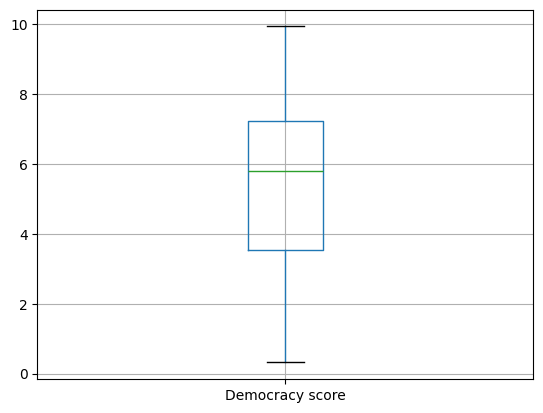

In [50]:
### Using Box Plots to identify the outlier
# Individual data points beyond the whiskers are shown as dots and are considered potential outliers.
# Example 1 : Covid cases dataframe
import matplotlib.pyplot as plt
data.boxplot(column='Democracy score')
plt.show()

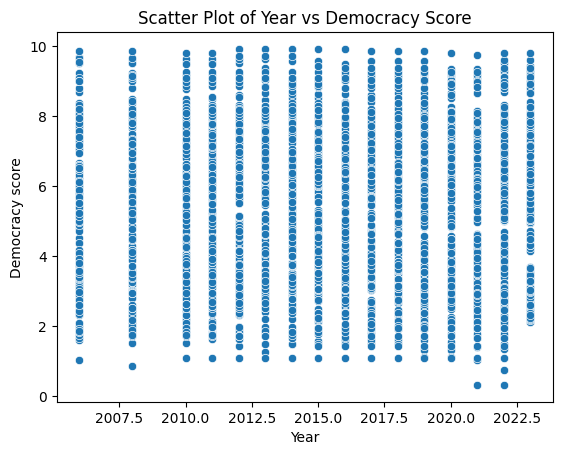

In [51]:
sns.scatterplot(x='Year', y='Democracy score', data=df)
plt.title('Scatter Plot of Year vs Democracy Score')
plt.show()

Outliers based on IQR:
Empty DataFrame
Columns: [Entity, Code, Year, Democracy score, Democracy score Binned, Z-score]
Index: []
